In [392]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from zipfile import ZipFile
from pathlib import Path
from typing import List, Tuple

from src.eda import plot_churn_distribution, plot_cat_cols, plot_churn_distribution

In [2]:
with ZipFile("archive.zip", "r") as f:
    f.extractall()

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f"Shape of dataset {df.shape}")
print(f"No. of duplicate rows: {df.duplicated().sum()}")
print(f"Number of missing values: {df.isna().sum().sum()}")

Shape of dataset (7043, 21)
No. of duplicate rows: 0
Number of missing values: 0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.iloc[:, :12].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No


In [6]:
df.iloc[:, 12:].head()

,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [395]:
plot_churn_distribution(df)

In [8]:
df.select_dtypes(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [9]:
total_charges = []
for val in df['TotalCharges']:
    try:
        total_charges.append(float(val))
    except ValueError:
        total_charges.append(0)
df['TotalCharges'] = total_charges
df.loc[df['TotalCharges']<1, 'TotalCharges'] = df['TotalCharges'].median()

In [329]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.extend(['SeniorCitizen'])
cat_cols.remove('customerID')
cat_cols.remove('Churn')
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('SeniorCitizen')

### EDA

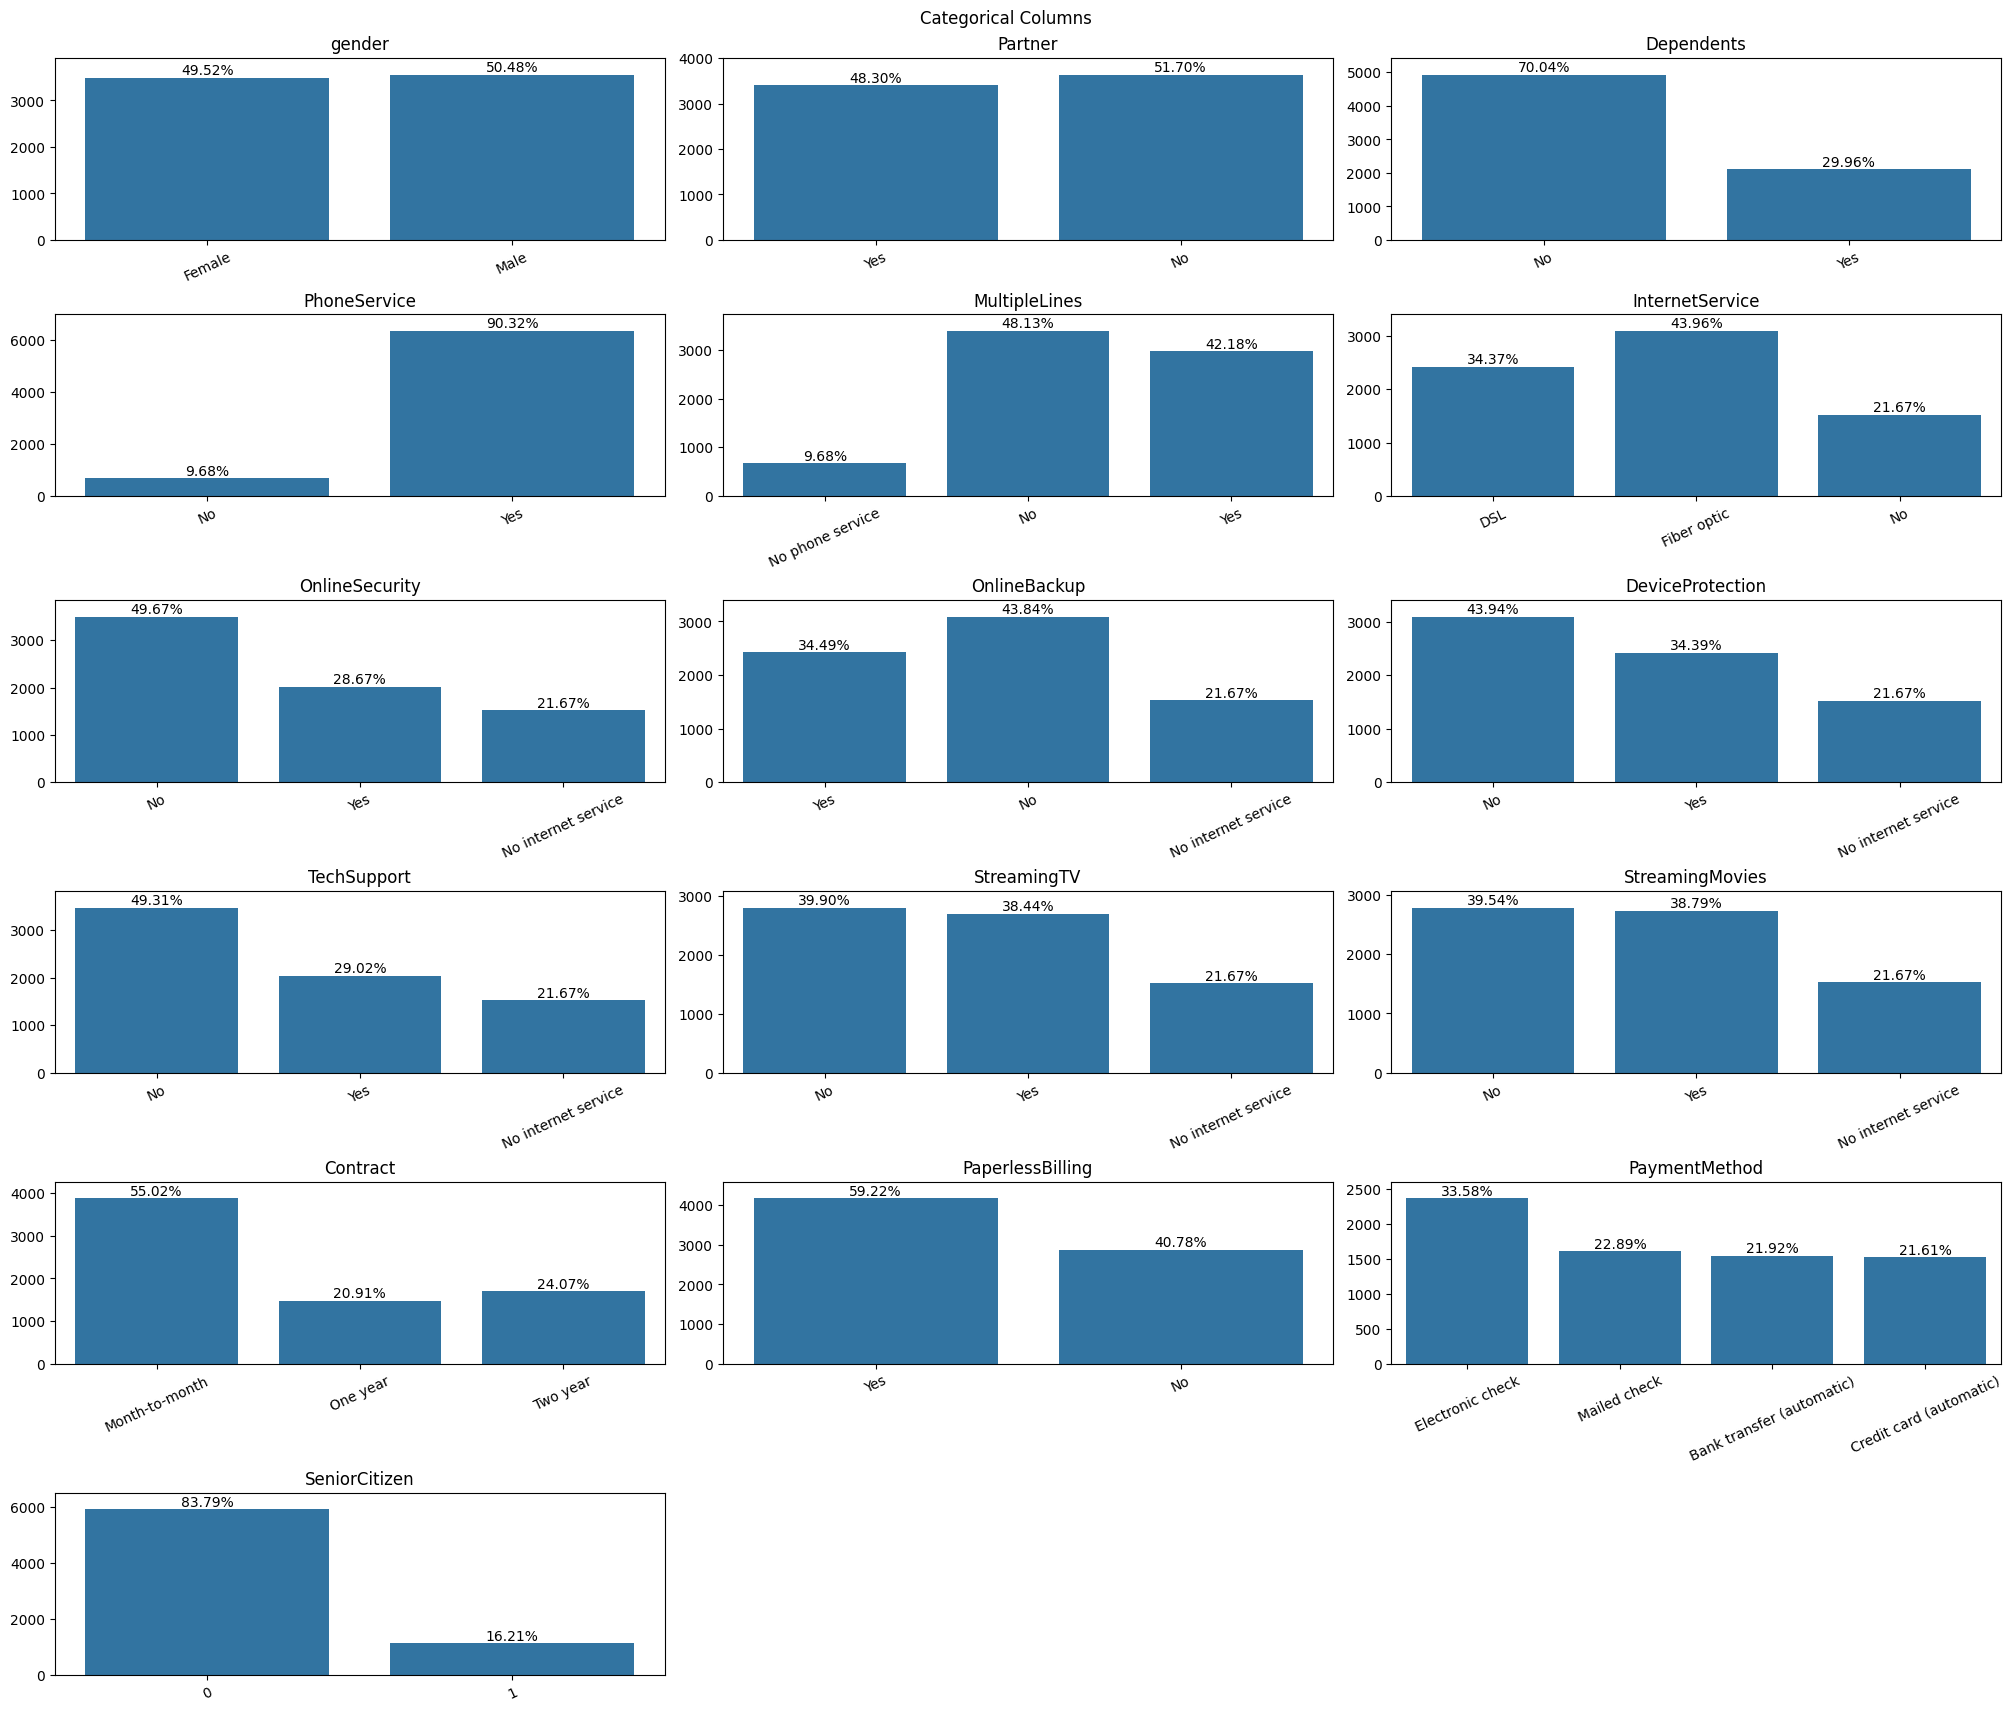

In [403]:
plot_cat_cols(df=df, cat_cols=cat_cols[:])


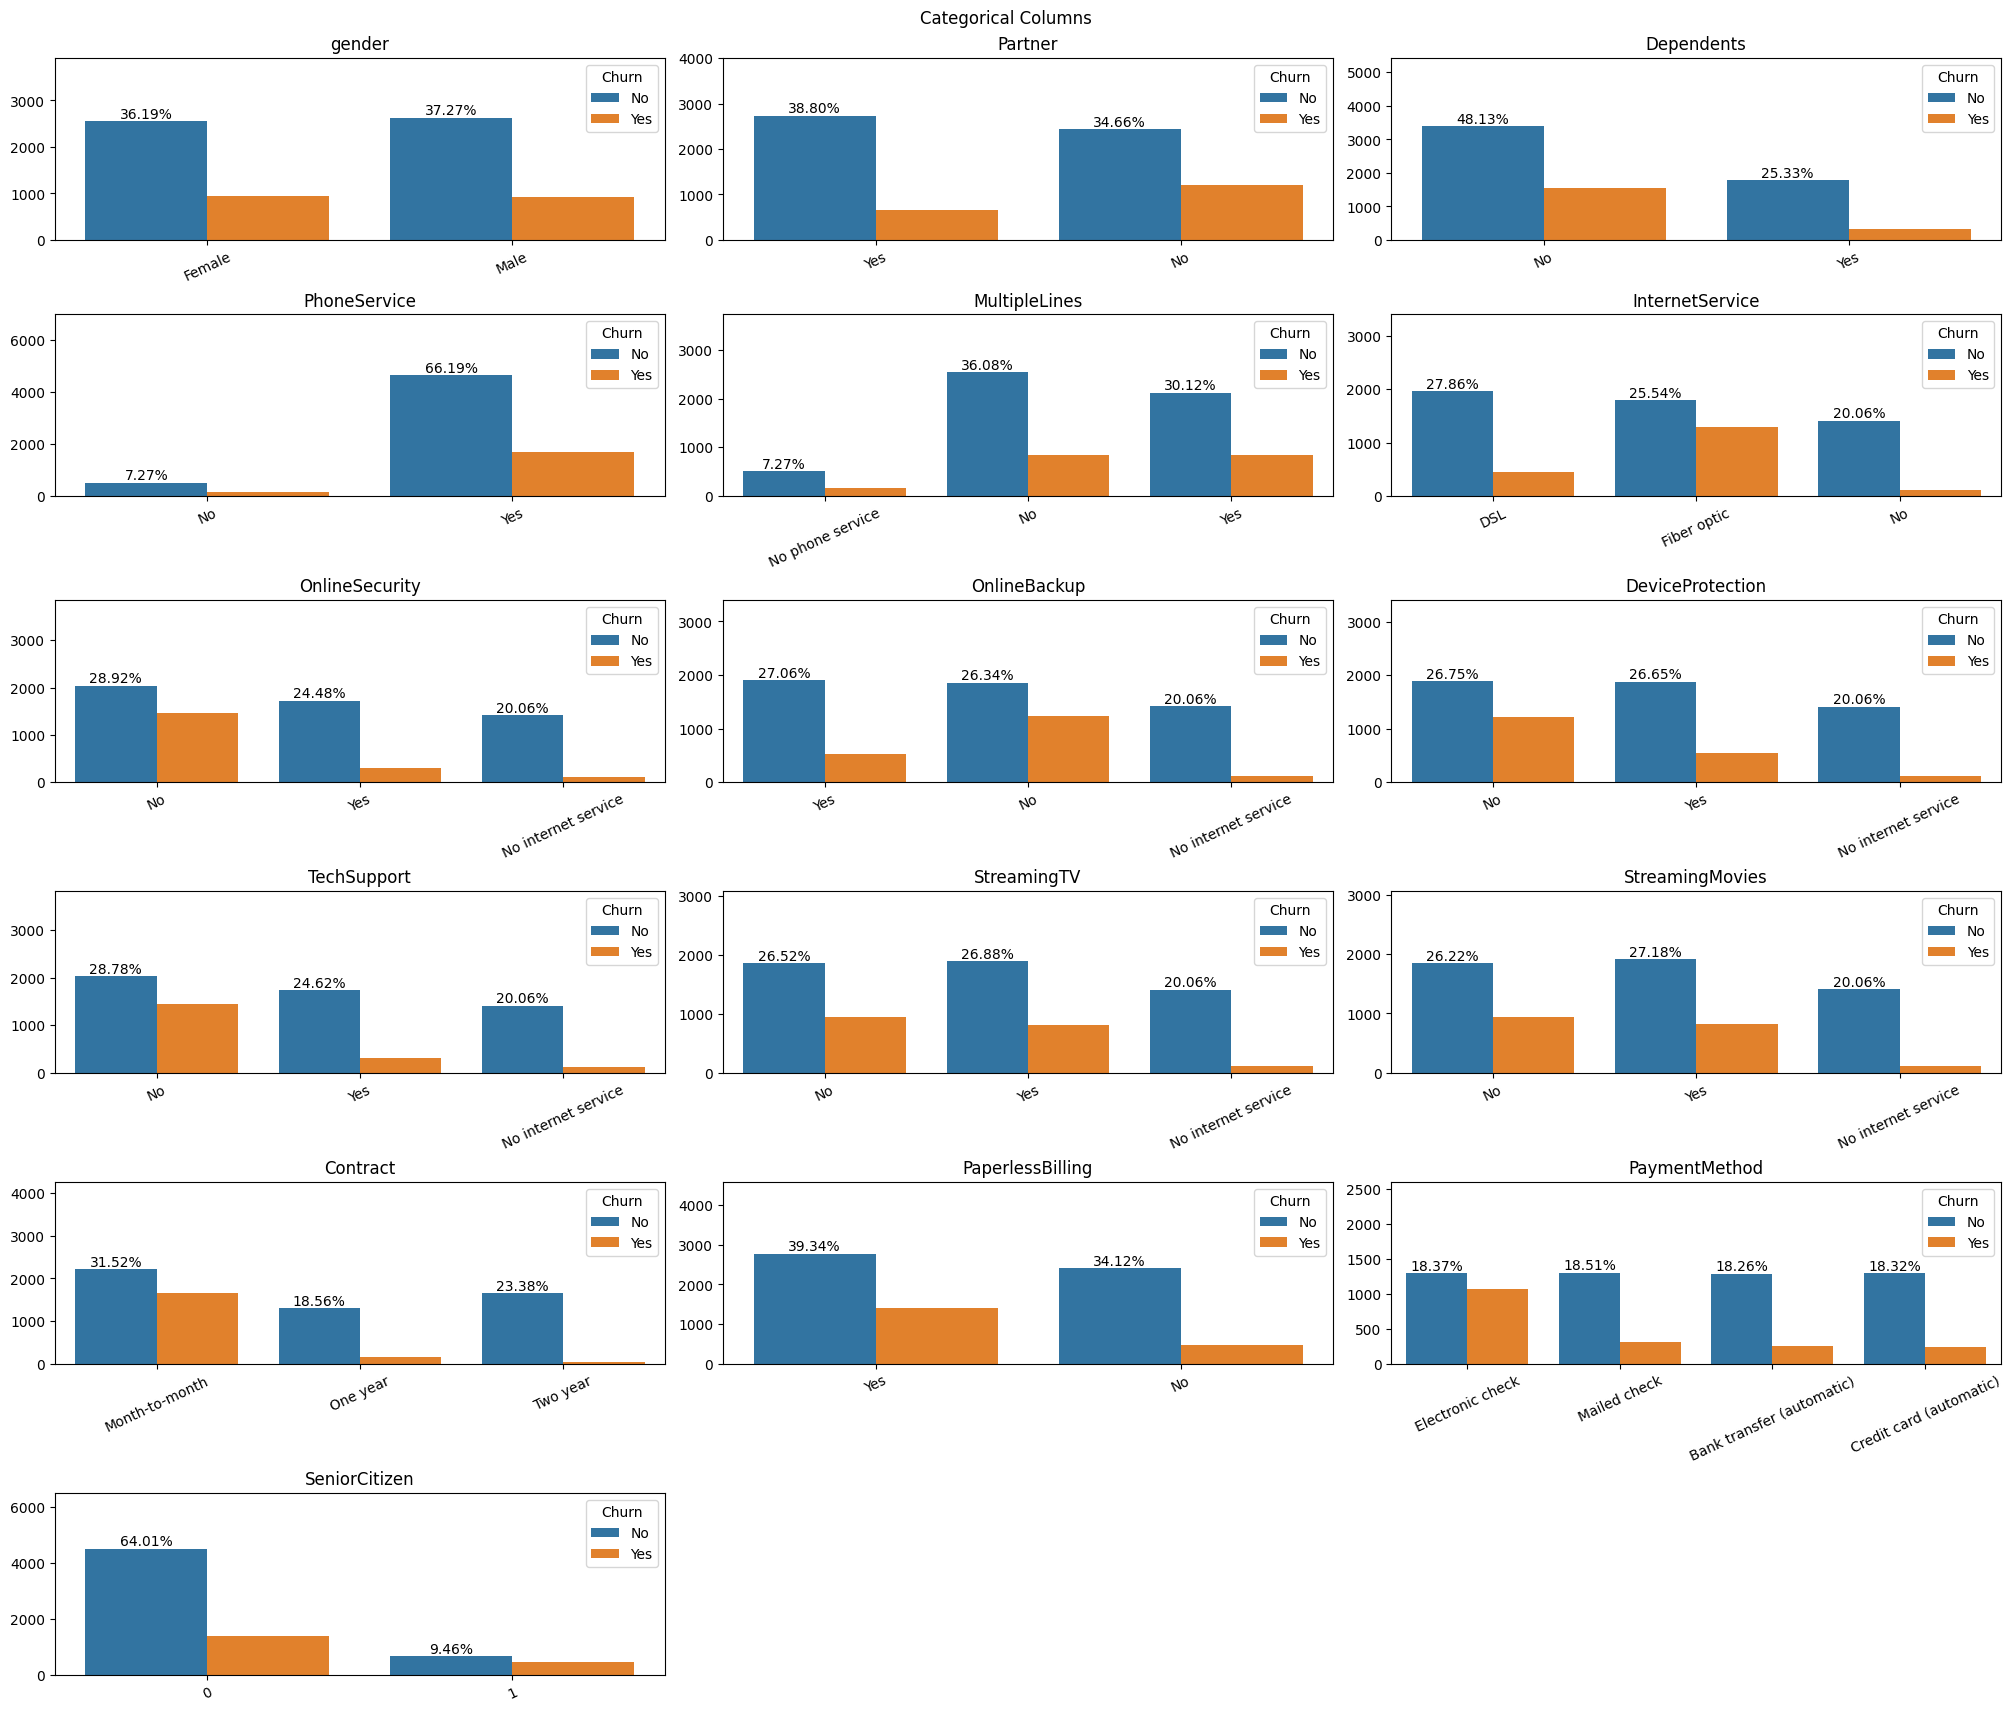

In [404]:
plot_cat_cols(df, cat_cols, hue=True) 

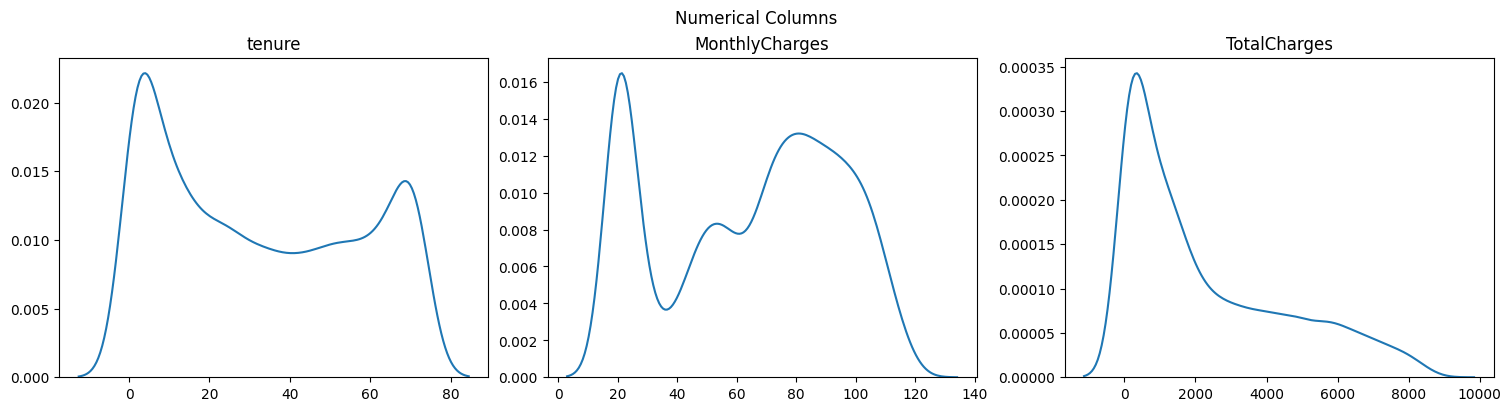

In [405]:
plot_num_cols(df, num_cols=num_cols, kde=True)       


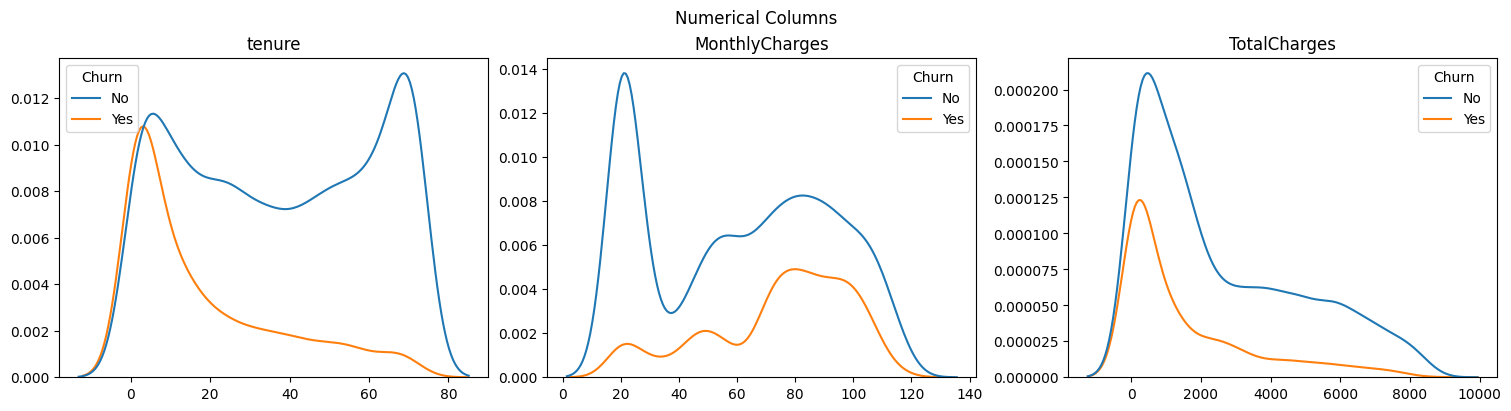

In [377]:
plot_num_cols(df, num_cols, hue=True, kde=True)

##### From the above of our numerical columns we note the following:
1. Customers tend to churn the most in the first 15 months, after that, they become really loyal and stick with the brand
2. ***High paying*** customers, **($70-$100)** tend to churn a lot, than low paying customers
3. It might look like ***customers who sepend less churn, but since `total charges` is a product of `tenure` and `monthly_charges`, we naturally expect early churners to have ***lower*** charges

In [347]:
def plot_churn_ratio(df: pd.DataFrame, cat_cols: List, nrows:int =3, figsize: Tuple =(15, 7)):
    ncols = int(np.ceil(len(cat_cols)/nrows))
    fig, ax = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols, constrained_layout=True)
    fig.suptitle(f"Churn Ratio")
    ax= ax.flatten()
    for idx, col in enumerate(cat_cols):
            churn_df = pd.crosstab(df[col], df['Churn'])
            churn_df['churn_ratio'] = churn_df['Yes']/ (churn_df['No']+ churn_df['Yes'])
            axis = sns.barplot(churn_df['churn_ratio'], ax=ax[idx])
            axis.set_title(f"{col}")
            axis.set_xlabel('')
            axis.set_ylabel('')
            rotation = 0 if len(churn_df) <=3 else 15
            axis.tick_params(axis='x', rotation=rotation)
            axis.bar_label(axis.containers[0], fmt=lambda x: f'{(x/len(churn_df))*100:0.2f}%')
            axis.set_ylim(0, (churn_df['churn_ratio'].max())*1.1)
    # plt.subplots_adjust(hspace=2, wspace=.5)

    for j in range(idx+1, len(ax)):
        fig.delaxes(ax[j])

Now, let's focus on the churn ratio to see what customer categories tend to churn the most, I'll firstly start with the 5 columns

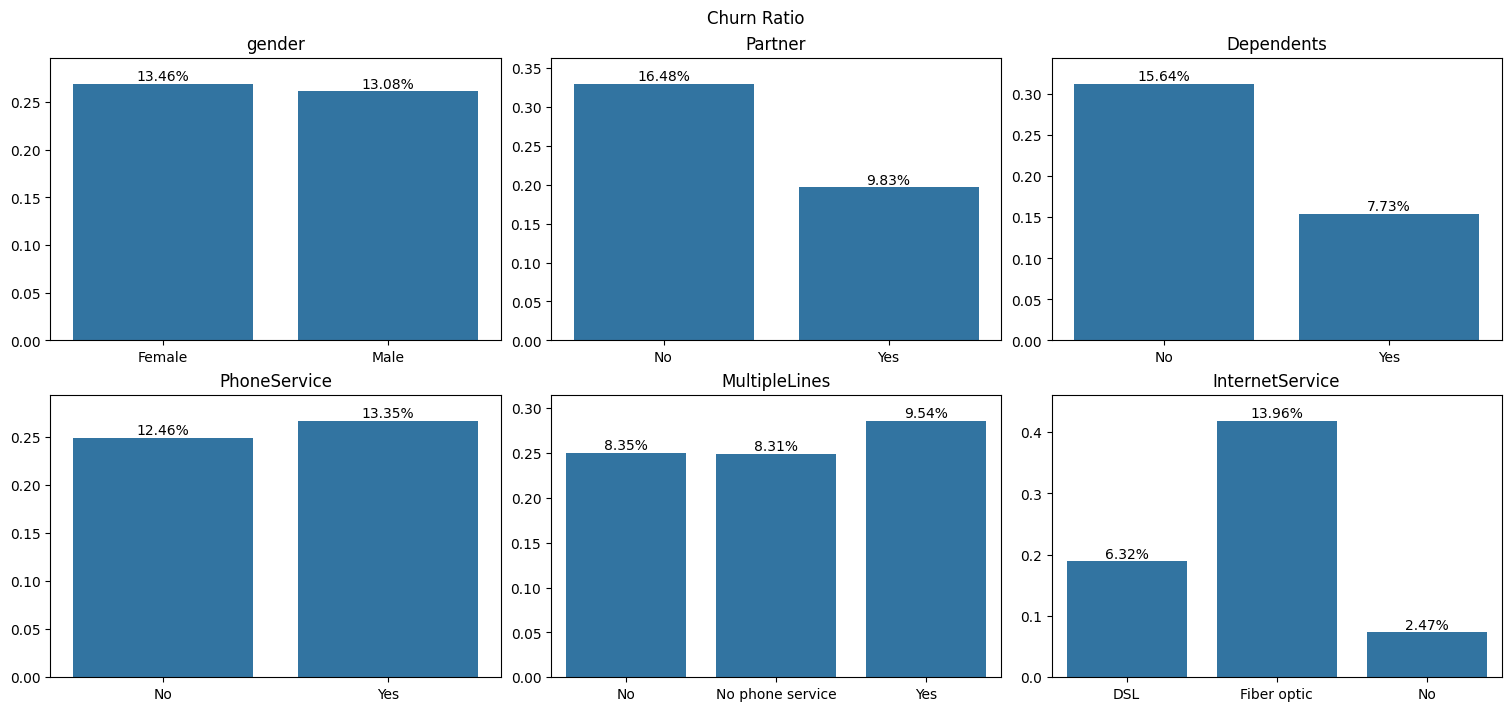

In [348]:
plot_churn_ratio(df, cat_cols=cat_cols[:6], nrows=2, figsize=(15, 7))

##### From the above plots, we see the following:
1. **Females** tend to churn more than **Males** but the difference isn't that large
2. Those with **no partners** tend to churn about ***two times*** than those with partners
3. Those with **depenedents** churn ***significantly higher*** than those with no **dependents**
4. **Fiber Optic** Subscribers churn at a very ***high*** rate

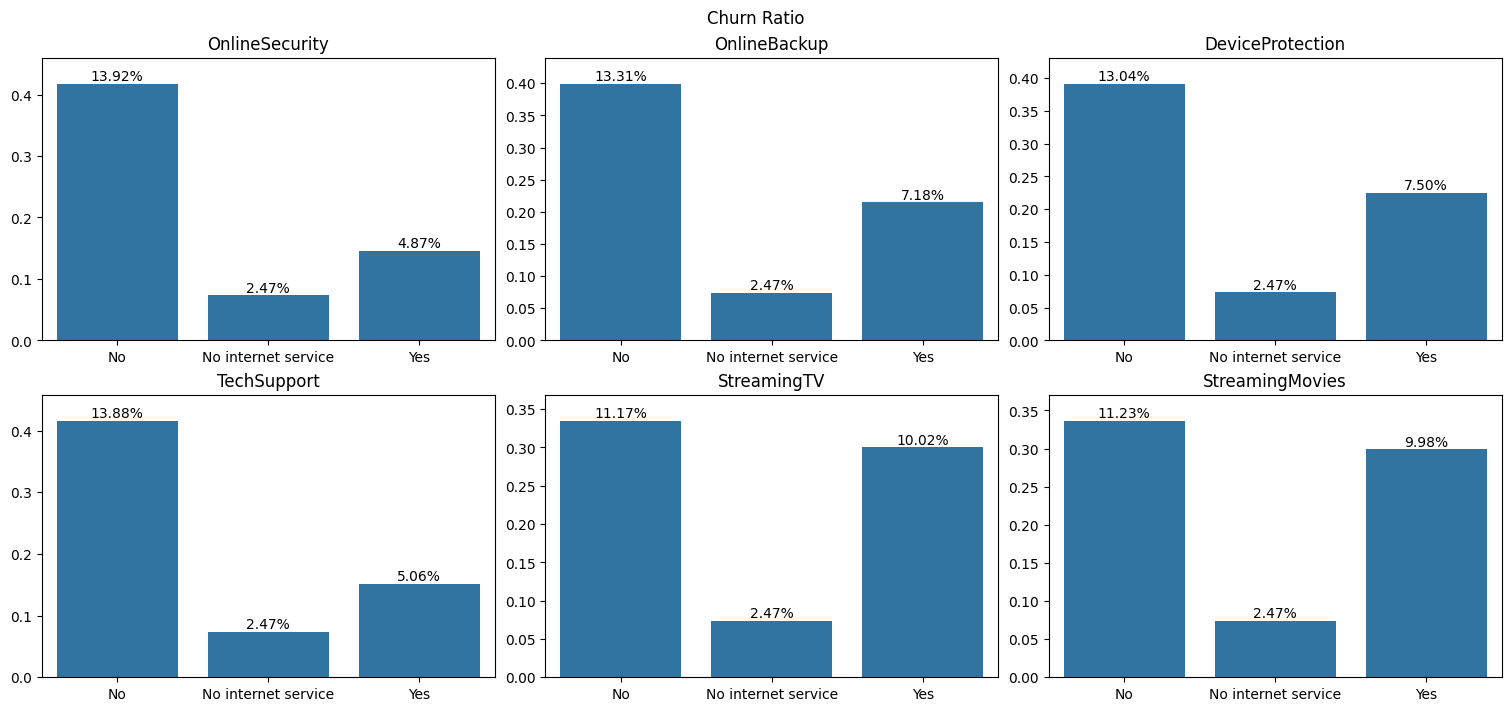

In [349]:
plot_churn_ratio(df, cat_cols[6:12], nrows=2)

##### Again, from the above we can observe the following:
1. **Online Security**, **Online Backup**, **Device Protection** and **Tech Support** are ***highly*** important to avoid customers churning
2. Customers who do ***not*** stream movies and TV churn ***slightly less*** than those who stream them

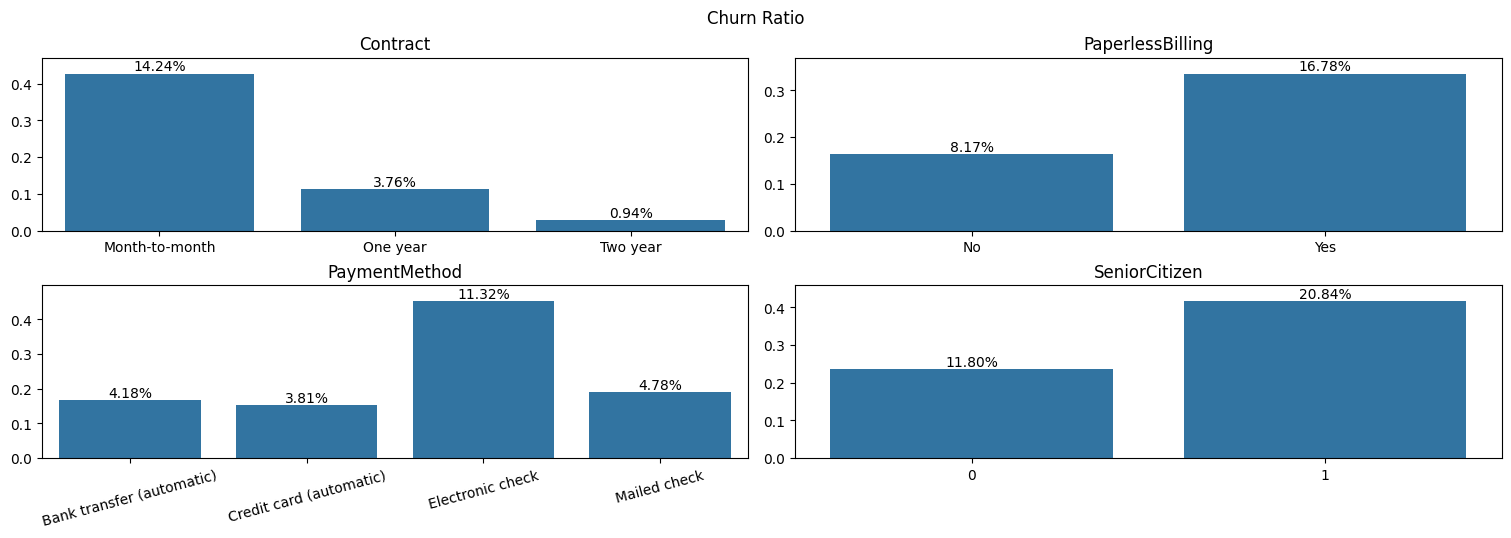

In [341]:
plot_churn_ratio(df, cat_cols[12:18])

##### Again, we can observe the following:
1. Customers who make **monthly** payments churn at a very high rate compared to customers on **annual** or **biennial** contracts, this suggests we should focus on moving customers to ***longer term*** plans
2. Customers are billed via ***paperless*** formats are signifinactly more likely to churn
3. Customers who make payments via **electronic checks** are highly mor ***likely** to churn compared to other payment means
4. Senior citizens are ***highly*** likely to churn compared to ***non-senior*** citizens

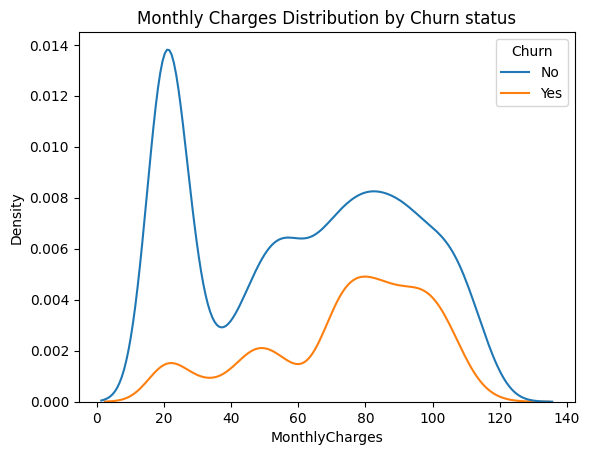

In [ ]:
sns.kdeplot(df, x='MonthlyCharges', hue='Churn')
plt.title(f"Monthly Charges Distribution by Churn status");
# df[df['Churn']=='No'][]

Text(0.5, 1.0, 'Coeeletion Matrix of Numerical columns')

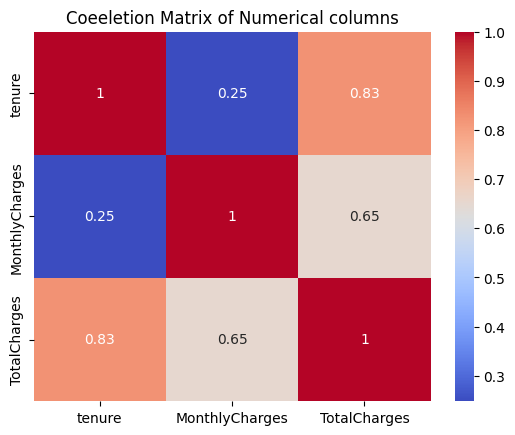

In [387]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title(f"Coeeletion Matrix of Numerical columns")

I'll prolly drop `monthly_charges` column since `total charges` is a product of `tenure` and `monthly_charges`, 

<Axes: xlabel='Churn'>

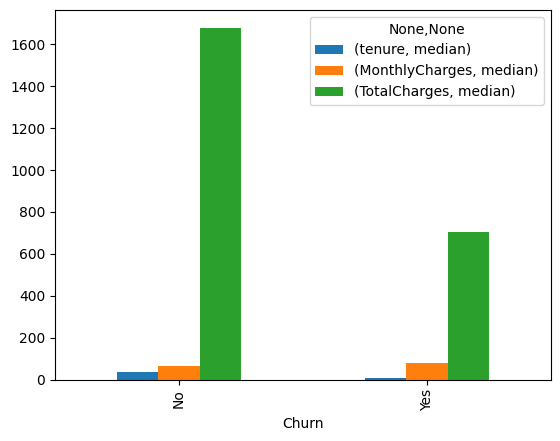

In [215]:
df.groupby('Churn')[num_cols].agg(['median']).plot(kind='bar')

<Axes: xlabel='InternetService'>

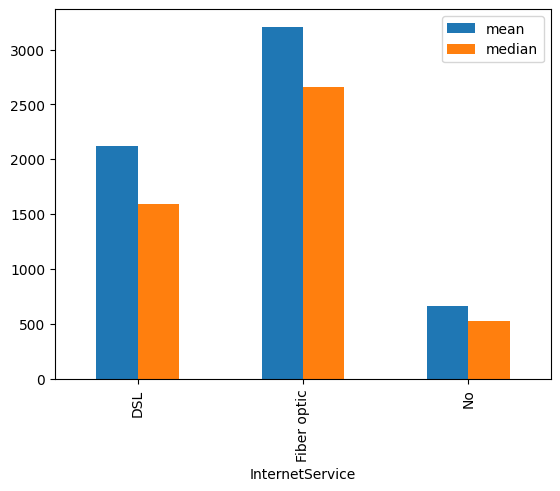

In [222]:
df.groupby('InternetService')['TotalCharges'].agg(['mean', 'median']).plot(kind='bar')

In [ ]:
df.groupby(['Contract', 'Churn'])['MonthlyCharges'].agg(['mean', 'median'])

mean  median
Contract       Churn                   
Month-to-month No     61.462635  64.950
               Yes    73.019396  79.050
One year       No     62.508148  64.850
               Yes    85.050904  95.050
Two year       No     60.012477  63.300
               Yes    86.777083  97.275